<h1><center>Decision Trees</center></h1>

### Learning Objective:
- Learn how to implement the Decision Tree algorighm by cleaning, preparing, modeling, and evaluating the data 

### Procedure
<img src="images/decision tree algo.png" style="width: 400px;"> 

***
When to use:
- output is a binary classifier
- One node in a Decision Tree contains all of or most of, one category of the data

Concept:
- choose an attribute
- calcuate entropy of the disinformation of the results
- calculate information gain (entropy prior to split, entropy at each leaf * the number of each category value infor in the leaf)

Questions to ask:
- Determine which attribute is the best attriubte to split the data
- Determine which attribute is the best or more predictive to split data based on the feature. 

Clean the data
- create an array of input values by separating inputs using a new df and using pandas.values

Prep the data
- convert all non-numerical values into an integer, dummies, sklearn.processing.label_encoder() .fit converts into numerical, .transform() applies normalization to values
- create training and testing sets using sklearn training_split

Create model
- use sklearn DecisionTreeClassifier class (type of decision tree -entropy, and max depth)
- fit the model using the x,y test set
- predict using y test set

Evaluate model
- use sklearn metrics.accuracy_score(y_test, predcit) to validate the predicted from the actual
Visualization

Modules used:
- sklearn: processing, DecisionTreeClassifier, train_test_split, metrics
***

In [103]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing, model_selection, tree, metrics

***
- Model uses  data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Prediction
- Predict the class of a unknown patient using a decision tree
***

***
### Load the data

In [84]:
my_data = pd.read_csv("datasets/drug200.csv", delimiter=",")
df = my_data
df[0:4]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


***
## Prepare the data - convert labels

Convert the features and target outcome into vectors aka arrays
- x: features (attributes and value)
> - x(attributes) = df.values
- y: target outcome
> - y(target outcomes) = df.values

Output is a Numpy array
- x, y = np array

In [95]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
y = df['Drug']

x[0:4], y[0:4]

(array([[23, 'F', 'HIGH', 'HIGH', 25.355],
        [47, 'M', 'LOW', 'HIGH', 13.093],
        [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
        [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999]], dtype=object),
 0    drugY
 1    drugC
 2    drugC
 3    drugX
 Name: Drug, dtype: object)

***
## Prepare the data - convert labels

Convert the features and target outcome into vectors aka arrays
- x: features (attributes and value)
> - x(attributes) = df.values
- y: target outcome
> - y(target outcomes) = df.values

Output is a Numpy array
- x, y = np array

***
### Convert feature labels

- covert categroical labels into numerical values using:

sklearn.processing.linear_encoding()

- convert encoded vector into a numpy array using .fit()

from the docs:

class sklearn.preprocessing.LabelEncoder

> LabelEncoder:
> is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. This is sometimes useful for writing efficient Cython routines

> Methods:
> - fit(y) : Fit label encoder
> - fit_transform(y) : Fit label encoder and return encoded labels
> - get_params([deep]) : Get parameters for this estimator.
> - inverse_transform(y) : Transform labels back to original encoding.
> - set_params(**params) : Set the parameters of this estimator.
> - transform(y) : Transform labels to normalized encoding.

Output is an array with all numerical values

In [96]:
from sklearn.preprocessing import LabelEncoder

def convert_columns_to_nums(np_array, columns):
    converter = LabelEncoder()
    converter.fit(columns)
    return converter.transform(np_array) 

sex_column = convert_columns_to_nums(x[:,1], ['F', 'M'])
BP_column = convert_columns_to_nums(x[:,2], ['HIGH', 'LOW', 'NORMAL'])
cholesterol_column = convert_columns_to_nums(x[:,3], ['HIGH', 'NORMAL'])

x[:,1] = sex_column
x[:,2] = BP_column
x[:,3] = cholesterol_column

x[0:4]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999]], dtype=object)

***
## Prepare the data - Split the data

- sklearn.model_selection.train_test_split(*arrays, **options)

from the docs:
    
> Parameters:
<br>
> *arrayssequence of indexables with same length / shape[0]
> Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.

> - test_size : float or int, default=None

> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

> - train_size : float or int, default=None

> If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

> - random_state : int or RandomState instance, default=None

> Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. See Glossary.

> - shuffle : bool, default=True

> Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

> - stratify : array-like, default=None

> If not None, data is split in a stratified fashion, using this as the class labels.

- sklearn.model_selection.train_test_split() is equivalent to the Numpy split version: (np.random.rand(len(df))< .80 )



***
## Modeling the data - create decision tree

- sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None) 

from the docs:

> - criterion:{“gini”, “entropy”}, default=”gini” The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

> - splitter:{“best”, “random”}, default=”best” The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

> - max_depth:int, default=None The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- fit the data using the x, y training set 
- predict using x test set


In [109]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=4)

decision_Tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
decision_Tree.fit(x_train, y_train)

y_hat  = decision_Tree.predict(x_test)

***
## Evaluation

- sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

from the docs:

> Parameters
> - y_true : 1d array-like, or label indicator array / sparse matrix
> Ground truth (correct) labels.

> - y_pred : 1d array-like, or label indicator array / sparse matrix
> Predicted labels, as returned by a classifier.

> - normalize : bool, optional (default=True)
> If False, return the number of correctly classified samples. Otherwise, return the fraction of correctly classified samples.

> - sample_weight : array-like of shape (n_samples,), default=None
> Sample weights.


In [107]:
evaluation = metrics.accuracy_score(y_test, y_hat)
print('Decision Tree Accuraccy', evaluation)

Decision Tree Accuraccy 0.95


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    Lets visualize the tree
</div>

In [ ]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
# !conda install -c conda-forge pydotplus -y
# !conda install -c conda-forge python-graphviz -y

In [114]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

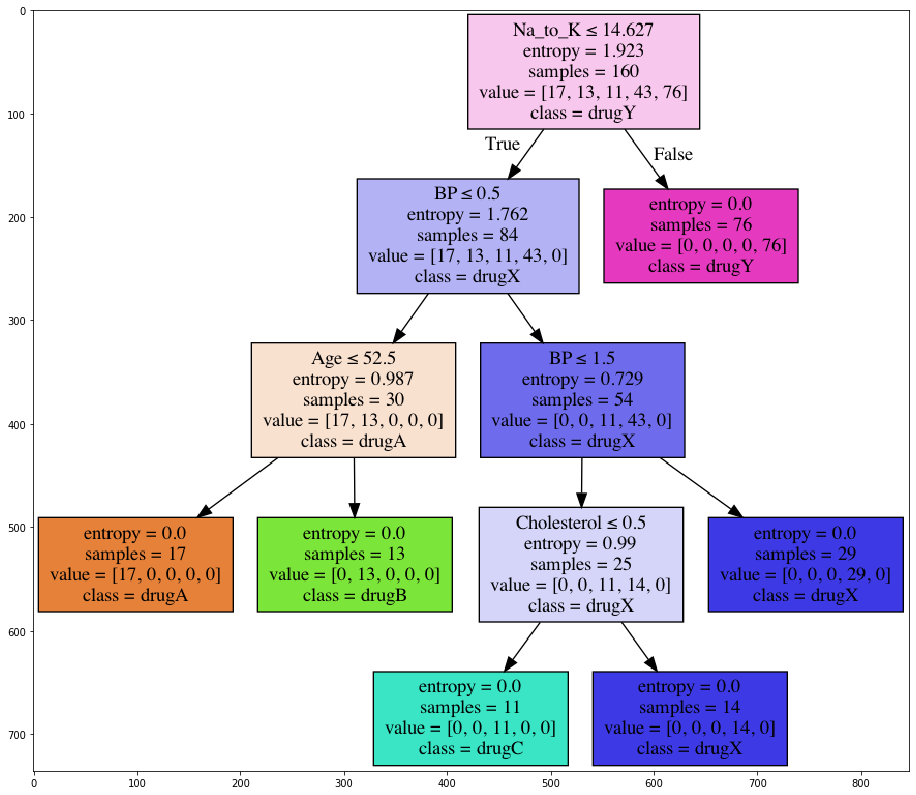

In [129]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(decision_Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(30, 14))
plt.imshow(img,interpolation='nearest')

In [160]:
import pandas as pd 
from sklearn import preprocessing, model_selection, tree, metrics 
preprocessing.LabelEncoder
model_selection.train_test_split
tree.DecisionTreeClassifier
metrics.accuracy_score

df = pd.read_csv('../datasets/drug200.csv')
my_data = df['Drug']

x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

def encoder(np_array, column_values):
    encoded = preprocessing.LabelEncoder().fit(column_values)
    return encoded.transform(np_array)

col_sex = encoder(x[:,1], ['F', 'M'])
col_BP = encoder(x[:,2], ['HIGH', 'LOW', 'NORMAL'])
col_cholesterol = encoder(x[:,3], ['HIGH', 'NORMAL'])

x[:,1] = col_sex
x[:,2] = col_BP
x[:,3] = col_cholesterol

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=4)

predict_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
predict_tree.fit(x_train, y_train)
y_hat = predict_tree.predict(x_test)


evaluation = metrics.accuracy_score(y_test, y_hat)
print('Accuracy Score: ', evaluation)

Accuracy Score:  0.95


## Result
- best result is when all features are selected
- w/out cholesterol result = 0.85
- w/out BP result = .50

<h2>Disclaimer</h2>

This script was orginally from Coursera's [IBM AI Engineering course](https://www.coursera.org/professional-certificates/ai-engineer), authored by <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a> and was modifed to fit my needs. 